In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
# The goal is to make predictions on whether or not the new applicants will qualify for home loan

import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Home_Loan.csv')
df

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,Yes,Rural,N
1,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,Yes,Urban,Y
2,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,Yes,Urban,Y
3,4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,Yes,Urban,Y
4,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267.0,360.0,Yes,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,361,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,Yes,Semiurban,NaN
787,362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,Yes,Urban,NaN
788,363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,Yes,Urban,NaN
789,365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,Yes,Rural,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         791 non-null    int64  
 1   Loan_ID            791 non-null    object 
 2   Gender             769 non-null    object 
 3   Married            791 non-null    object 
 4   Dependents         791 non-null    object 
 5   Education          791 non-null    object 
 6   Self_Employed      791 non-null    object 
 7   ApplicantIncome    791 non-null    int64  
 8   CoapplicantIncome  791 non-null    int64  
 9   LoanAmount         791 non-null    float64
 10  Loan_Amount_Term   791 non-null    float64
 11  Credit_History     791 non-null    object 
 12  Property_Area      791 non-null    object 
 13  Loan_Status        492 non-null    object 
dtypes: float64(2), int64(3), object(9)
memory usage: 86.6+ KB


In [5]:
dataframe = df.drop(columns = ['Unnamed: 0'])
dataframe

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,Yes,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,Yes,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,Yes,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,Yes,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267.0,360.0,Yes,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,Yes,Semiurban,NaN
787,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,Yes,Urban,NaN
788,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,Yes,Urban,NaN
789,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,Yes,Rural,NaN


In [6]:
DF = dataframe[dataframe['Loan_Status'].notnull()]
DF

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,Yes,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,Yes,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,Yes,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,Yes,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267.0,360.0,Yes,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,LP002978,Female,No,0,Graduate,No,2900,0,71.0,360.0,Yes,Rural,Y
488,LP002979,Male,Yes,3+,Graduate,No,4106,0,40.0,180.0,Yes,Rural,Y
489,LP002983,Male,Yes,1,Graduate,No,8072,240,253.0,360.0,Yes,Urban,Y
490,LP002984,Male,Yes,2,Graduate,No,7583,0,187.0,360.0,Yes,Urban,Y


In [7]:
# We will be using this dataframe to train/test our model

DF1 = DF.drop(columns='Loan_ID')
DF1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,Yes,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,Yes,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,Yes,Urban,Y
3,Male,No,0,Graduate,No,6000,0,141.0,360.0,Yes,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196,267.0,360.0,Yes,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
487,Female,No,0,Graduate,No,2900,0,71.0,360.0,Yes,Rural,Y
488,Male,Yes,3+,Graduate,No,4106,0,40.0,180.0,Yes,Rural,Y
489,Male,Yes,1,Graduate,No,8072,240,253.0,360.0,Yes,Urban,Y
490,Male,Yes,2,Graduate,No,7583,0,187.0,360.0,Yes,Urban,Y


We Will Use The Loan_ID For Future Use Just In Case

In [8]:
Loan_ID = DF['Loan_ID']
Loan_ID

0      LP001003
1      LP001005
2      LP001006
3      LP001008
4      LP001011
         ...   
487    LP002978
488    LP002979
489    LP002983
490    LP002984
491    LP002990
Name: Loan_ID, Length: 492, dtype: object

In [9]:
DF1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 0 to 491
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            492 non-null    object 
 2   Dependents         492 non-null    object 
 3   Education          492 non-null    object 
 4   Self_Employed      492 non-null    object 
 5   ApplicantIncome    492 non-null    int64  
 6   CoapplicantIncome  492 non-null    int64  
 7   LoanAmount         492 non-null    float64
 8   Loan_Amount_Term   492 non-null    float64
 9   Credit_History     492 non-null    object 
 10  Property_Area      492 non-null    object 
 11  Loan_Status        492 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 50.0+ KB


In [10]:
New_Applicants = df[df['Loan_Status'].isnull()]
New_Applicants

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
492,0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,Yes,Urban,NaN
493,1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,Yes,Urban,NaN
494,2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,Yes,Urban,NaN
495,4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,Yes,Urban,NaN
496,5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,Yes,Urban,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,361,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,Yes,Semiurban,NaN
787,362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,Yes,Urban,NaN
788,363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,Yes,Urban,NaN
789,365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,Yes,Rural,NaN


In [11]:
# We will be Using this dataframe to make predictions on

New_Applicants_w_no_NaNN = New_Applicants.drop(columns = ['Loan_Status', 'Unnamed: 0'])
New_Applicants_w_no_NaNN

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
492,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,Yes,Urban
493,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,Yes,Urban
494,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,Yes,Urban
495,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,Yes,Urban
496,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,Yes,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
786,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,Yes,Semiurban
787,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,Yes,Urban
788,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,Yes,Urban
789,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,Yes,Rural


In [12]:
# Turning objects (strings) into numbers

dummies = pd.get_dummies(DF1)
dummies

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_No,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,4583,1508,128.0,360.0,False,True,False,True,False,True,...,False,True,False,False,True,True,False,False,True,False
1,3000,0,66.0,360.0,False,True,False,True,True,False,...,False,False,True,False,True,False,False,True,False,True
2,2583,2358,120.0,360.0,False,True,False,True,True,False,...,True,True,False,False,True,False,False,True,False,True
3,6000,0,141.0,360.0,False,True,True,False,True,False,...,False,True,False,False,True,False,False,True,False,True
4,5417,4196,267.0,360.0,False,True,False,True,False,False,...,False,False,True,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2900,0,71.0,360.0,True,False,True,False,True,False,...,False,True,False,False,True,True,False,False,False,True
488,4106,0,40.0,180.0,False,True,False,True,False,False,...,False,True,False,False,True,True,False,False,False,True
489,8072,240,253.0,360.0,False,True,False,True,False,True,...,False,True,False,False,True,False,False,True,False,True
490,7583,0,187.0,360.0,False,True,False,True,False,False,...,False,True,False,False,True,False,False,True,False,True


In [13]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 0 to 491
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          492 non-null    int64  
 1   CoapplicantIncome        492 non-null    int64  
 2   LoanAmount               492 non-null    float64
 3   Loan_Amount_Term         492 non-null    float64
 4   Gender_Female            492 non-null    bool   
 5   Gender_Male              492 non-null    bool   
 6   Married_No               492 non-null    bool   
 7   Married_Yes              492 non-null    bool   
 8   Dependents_0             492 non-null    bool   
 9   Dependents_1             492 non-null    bool   
 10  Dependents_2             492 non-null    bool   
 11  Dependents_3+            492 non-null    bool   
 12  Education_Graduate       492 non-null    bool   
 13  Education_Not Graduate   492 non-null    bool   
 14  Self_Employed_No         492 no

In [14]:
float_col = dummies.iloc[:, 4:29]
float_col

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_No,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,False,True,False,True,False,True,False,False,True,False,True,False,False,True,True,False,False,True,False
1,False,True,False,True,True,False,False,False,True,False,False,True,False,True,False,False,True,False,True
2,False,True,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,True
3,False,True,True,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,True
4,False,True,False,True,False,False,True,False,True,False,False,True,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,True,False,True,False,True,False,False,False,True,False,True,False,False,True,True,False,False,False,True
488,False,True,False,True,False,False,False,True,True,False,True,False,False,True,True,False,False,False,True
489,False,True,False,True,False,True,False,False,True,False,True,False,False,True,False,False,True,False,True
490,False,True,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True,False,True


In [15]:
floats = float_col = float_col.astype(float)
floats

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_No,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
488,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
489,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
490,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [16]:
float_col_2 = dummies.iloc[:, 0:4]
float_col_2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,4583,1508,128.0,360.0
1,3000,0,66.0,360.0
2,2583,2358,120.0,360.0
3,6000,0,141.0,360.0
4,5417,4196,267.0,360.0
...,...,...,...,...
487,2900,0,71.0,360.0
488,4106,0,40.0,180.0
489,8072,240,253.0,360.0
490,7583,0,187.0,360.0


In [17]:
ML_dataset = float_col_2.join(floats)
ML_dataset

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_No,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,4583,1508,128.0,360.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,3000,0,66.0,360.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,2583,2358,120.0,360.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,6000,0,141.0,360.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,5417,4196,267.0,360.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2900,0,71.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
488,4106,0,40.0,180.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
489,8072,240,253.0,360.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
490,7583,0,187.0,360.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [18]:
# Before making the model, we split our dataframe of which we want to use, and place it in train_test_split
# We split them by X, y

X = np.array(ML_dataset.drop(columns=['Loan_Status_N', 'Loan_Status_Y']))
X

array([[4.583e+03, 1.508e+03, 1.280e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [3.000e+03, 0.000e+00, 6.600e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.583e+03, 2.358e+03, 1.200e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [8.072e+03, 2.400e+02, 2.530e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [7.583e+03, 0.000e+00, 1.870e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [4.583e+03, 0.000e+00, 1.330e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [19]:
type(X)

numpy.ndarray

In [20]:
y = np.array(ML_dataset[['Loan_Status_N', 'Loan_Status_Y']])
y

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

Creating Model

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train

array([[5.821e+03, 0.000e+00, 1.440e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [7.660e+03, 0.000e+00, 1.040e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [3.625e+03, 0.000e+00, 1.080e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [7.441e+03, 0.000e+00, 1.940e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.383e+03, 3.334e+03, 1.720e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [5.042e+03, 2.083e+03, 1.850e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [24]:
X_train.shape

(393, 21)

In [25]:
X_test

array([[7.2000e+03, 0.0000e+00, 1.2000e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.3990e+03, 1.6400e+03, 1.1100e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [4.3010e+03, 0.0000e+00, 1.1800e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [1.8360e+03, 3.3837e+04, 9.0000e+01, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [4.9170e+03, 0.0000e+00, 1.3000e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.4866e+04, 0.0000e+00, 7.0000e+01, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [26]:
X_test.shape

(99, 21)

In [27]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [28]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dtc = DecisionTreeClassifier()

In [31]:
# To show different type of parameters in Decision Tree Classifier

dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [32]:
type(X_train)

numpy.ndarray

In [33]:
# Fit data (X, y) to create model

dtree = dtc.fit(X_train, y_train)
dtree

DecisionTreeClassifier()

In [34]:
# Making prediction

y_pred = dtc.predict(X_test)
y_pred

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [35]:
type(y_pred)

numpy.ndarray

In [36]:
type(y_test)

numpy.ndarray

In [37]:
len(y_test)

99

In [38]:
len(y_pred)

99

<Axes: >

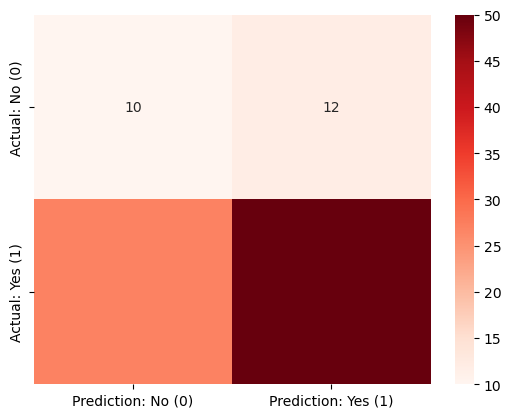

In [39]:
# Run metrics to see well our model did when predicting data

from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mat = (confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
sns.heatmap(confusion_mat,
            cmap='Reds',
            xticklabels=['Prediction: No (0)', 'Prediction: Yes (1)'],
            yticklabels=['Actual: No (0)', 'Actual: Yes (1)'],
            annot=True)

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.45      0.34        22
           1       0.81      0.65      0.72        77

   micro avg       0.61      0.61      0.61        99
   macro avg       0.54      0.55      0.53        99
weighted avg       0.69      0.61      0.63        99
 samples avg       0.61      0.61      0.61        99



In [41]:
ycolumns = pd.DataFrame(y_pred)
ycolumns

,0,1
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
94,0.0,1.0
95,0.0,1.0
96,0.0,1.0
97,1.0,0.0


In [42]:
class_1 = ycolumns[ycolumns[1] == 1]
class_1

,0,1
2,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
9,0.0,1.0
...,...,...
92,0.0,1.0
94,0.0,1.0
95,0.0,1.0
96,0.0,1.0


In [43]:
xcolumns = pd.DataFrame(y_test)
xcolumns

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
94,0.0,1.0
95,1.0,0.0
96,1.0,0.0
97,0.0,1.0


In [44]:
class_1x = xcolumns[xcolumns[1] == 1]
class_1x

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
91,0.0,1.0
92,0.0,1.0
94,0.0,1.0
97,0.0,1.0


In [45]:
from sklearn.metrics import accuracy_score

print('Prediction:', accuracy_score(y_test, y_pred))


Prediction: 0.6060606060606061


In [46]:
d = confusion_mat

g = pd.DataFrame(d)
g

,0,1
0,10,12
1,27,50


### **Looking For Accuracy & Overfitting**

In [47]:
TN = g[0].iloc[0]
TP = g[1].iloc[1]
FP = g[1].iloc[0]
FN = g[0].iloc[1]

Bottom = TN + FP + FN + TP
Bottom

Top = TN +TP

decimal = Top/Bottom
Accuracy = decimal * 100

print('Accuracy:', int(Accuracy),'%')


Accuracy: 60 %


In [48]:
y_train_pred = dtc.predict(X_train)


In [49]:
training = accuracy_score(y_train, y_train_pred)
train_acc = int(training) * 100

print('Train Accuracy:', train_acc, '%')

Train Accuracy: 100 %


In [50]:
print(confusion_matrix(y_train.argmax(axis=1), y_train_pred.argmax(axis=1)))

[[131   0]
 [  0 262]]


In [51]:
# Viewign which had the biggest impact on model
# Start by classifying importances for each column

dtc.feature_importances_

array([0.19248597, 0.09055671, 0.21913446, 0.0484668 , 0.01837885,
       0.00763359, 0.02392338, 0.01192748, 0.00706107, 0.01404407,
       0.00629142, 0.01261634, 0.0076048 , 0.00429389, 0.00588877,
       0.02137405, 0.        , 0.27375499, 0.        , 0.01738779,
       0.01717557])

In [52]:
toe = ML_dataset.drop(columns=['Loan_Status_Y', 'Loan_Status_N']).columns
toe

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_No',
       'Credit_History_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [53]:
toe.shape

(21,)

In [54]:
importance = pd.DataFrame(dtc.feature_importances_, index=toe)
importance

,0
ApplicantIncome,0.192486
CoapplicantIncome,0.090557
LoanAmount,0.219134
Loan_Amount_Term,0.048467
Gender_Female,0.018379
Gender_Male,0.007634
Married_No,0.023923
Married_Yes,0.011927
Dependents_0,0.007061
Dependents_1,0.014044


In [55]:
importance.describe()

,0
count,21.000000
mean,0.047619
std,0.079267
min,0.000000
25%,0.007061
50%,0.014044
75%,0.023923
max,0.273755


In [56]:
max = pd.DataFrame(dtc.feature_importances_, index=toe).max()
max

0    0.273755
dtype: float64

In [57]:
dtc2 = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.04)

In [58]:
dtree2 = dtc2.fit(X_train, y_train)
dtree2

DecisionTreeClassifier(ccp_alpha=0.04, criterion='entropy')

In [59]:
y_pred2 = dtc2.predict(X_test)

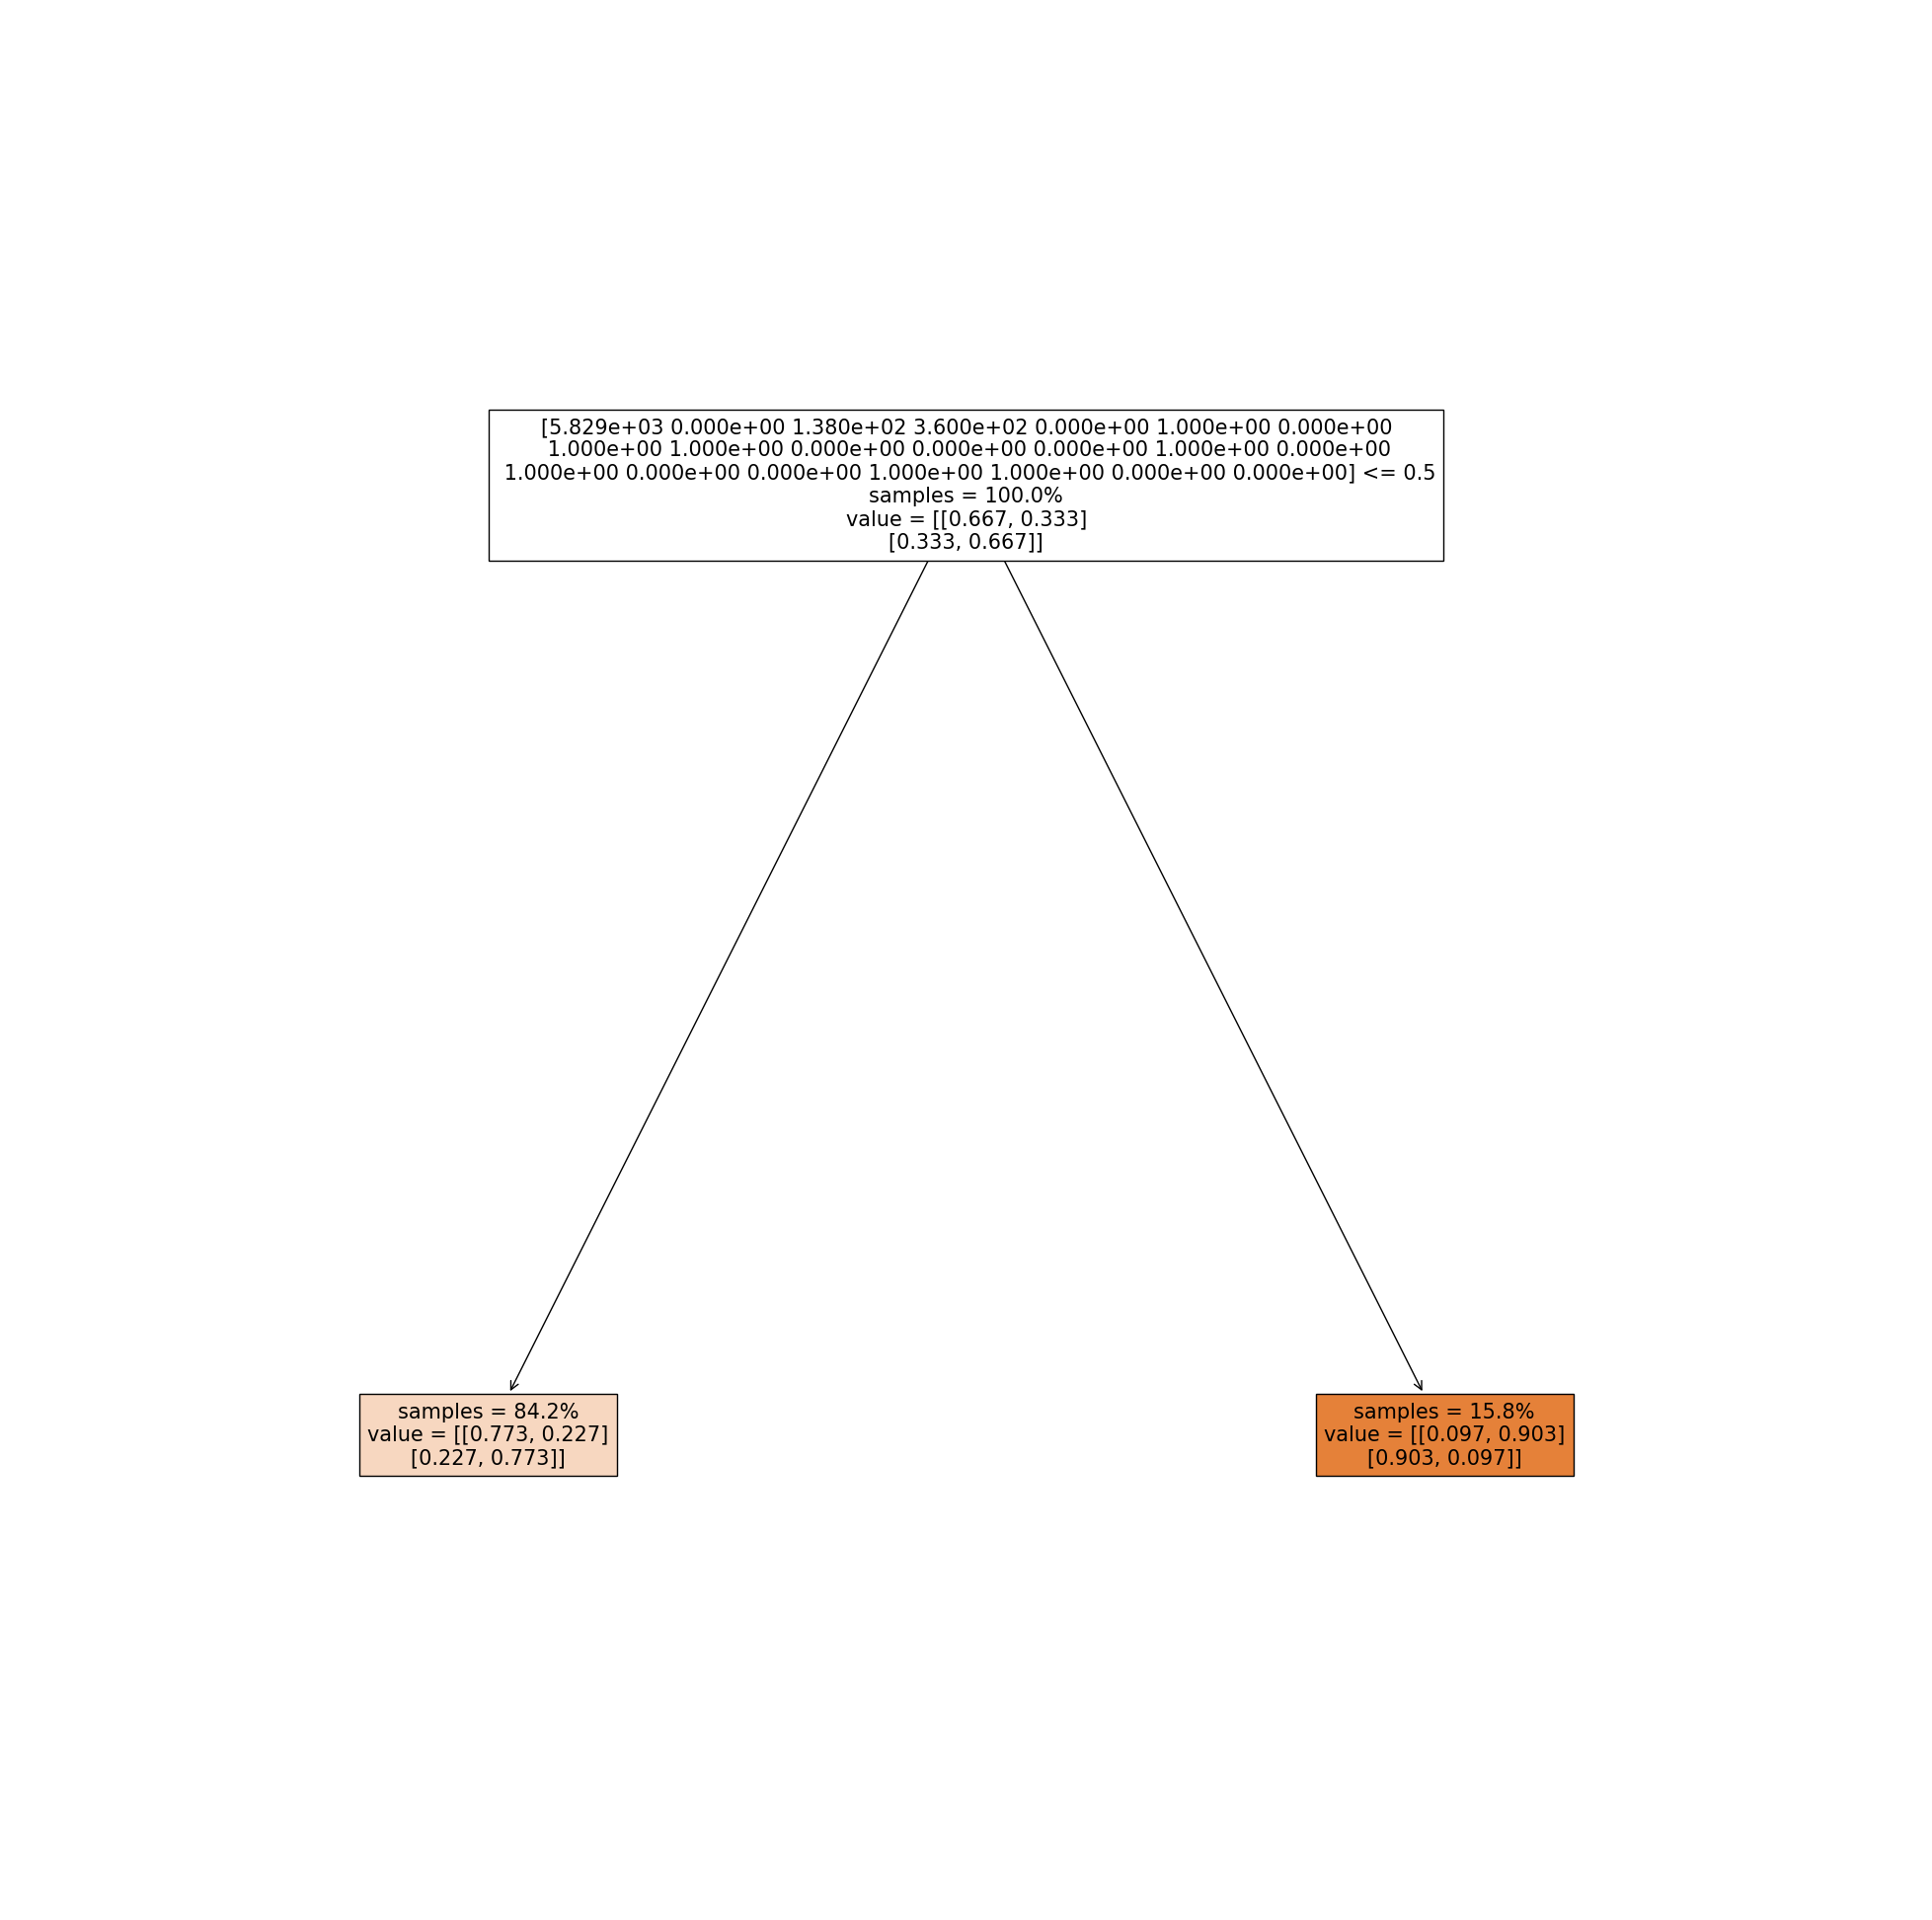

In [60]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(25, 25))
plot_tree(dtree2,
          feature_names=X_train,
          class_names=['Y', 'N'],
          impurity=False,
          proportion=True,
          filled=True)
fig.savefig('decision_tree.png')

<Axes: >

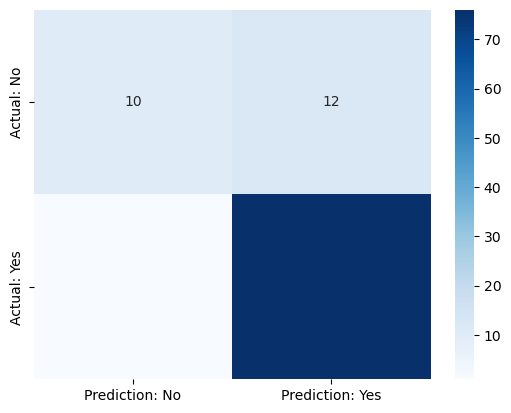

In [61]:
confusion_mat2 = (confusion_matrix(y_test.argmax(axis=1), y_pred2.argmax(axis=1)))
sns.heatmap(confusion_mat2,
            cmap='Blues',
            xticklabels=['Prediction: No', 'Prediction: Yes'],
            yticklabels=['Actual: No', 'Actual: Yes'],
            annot=True)

In [62]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.45      0.61        22
           1       0.86      0.99      0.92        77

   micro avg       0.87      0.87      0.87        99
   macro avg       0.89      0.72      0.76        99
weighted avg       0.87      0.87      0.85        99
 samples avg       0.87      0.87      0.87        99



In [63]:
d2 = confusion_mat2

g2 = pd.DataFrame(d2)
g2

,0,1
0,10,12
1,1,76


In [64]:
TP_2 = g2[1].iloc[1]
FP_2 = g2[1].iloc[0]
FN_2 = g2[0].iloc[1]
TN_2 = g2[0].iloc[0]

Bottom2 = TN_2 + FP_2 + FN_2 + TP_2

Top2 = TN_2 +TP_2

decimal2 = Top2/Bottom2
Accuracy2 = decimal2 * 100

print('Accuracy:', int(Accuracy2),'%')

Accuracy: 86 %


In [65]:
y_train_pred2 = dtc2.predict(X_train)
training2 = accuracy_score(y_train, y_train_pred2)
training2

#print('Train Accuracy:', predict2)

0.7938931297709924

In [66]:
dtc2.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0.])

In [67]:
importance2 = pd.DataFrame(dtc2.feature_importances_, index=toe)
importance2

,0
ApplicantIncome,0.0
CoapplicantIncome,0.0
LoanAmount,0.0
Loan_Amount_Term,0.0
Gender_Female,0.0
Gender_Male,0.0
Married_No,0.0
Married_Yes,0.0
Dependents_0,0.0
Dependents_1,0.0


In [68]:
New_Applicants_w_no_NaNN

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
492,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,Yes,Urban
493,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,Yes,Urban
494,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,Yes,Urban
495,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,Yes,Urban
496,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,Yes,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
786,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,Yes,Semiurban
787,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,Yes,Urban
788,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,Yes,Urban
789,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,Yes,Rural


In [69]:
new_df = New_Applicants_w_no_NaNN.drop(columns=['Loan_ID'])
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
492,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,Yes,Urban
493,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,Yes,Urban
494,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,Yes,Urban
495,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,Yes,Urban
496,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,Yes,Urban
...,...,...,...,...,...,...,...,...,...,...,...
786,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,Yes,Semiurban
787,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,Yes,Urban
788,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,Yes,Urban
789,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,Yes,Rural


In [70]:
# Save this for later

LD = New_Applicants_w_no_NaNN['Loan_ID']
LD

492    LP001015
493    LP001022
494    LP001031
495    LP001051
496    LP001054
         ...   
786    LP002969
787    LP002971
788    LP002975
789    LP002986
790    LP002989
Name: Loan_ID, Length: 299, dtype: object

In [71]:
new_dummies = pd.get_dummies(new_df)
new_dummies

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_No,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
492,5720,0,110.0,360.0,False,True,False,True,True,False,...,False,True,False,True,False,False,True,False,False,True
493,3076,1500,126.0,360.0,False,True,False,True,False,True,...,False,True,False,True,False,False,True,False,False,True
494,5000,1800,208.0,360.0,False,True,False,True,False,False,...,False,True,False,True,False,False,True,False,False,True
495,3276,0,78.0,360.0,False,True,True,False,True,False,...,False,False,True,True,False,False,True,False,False,True
496,2165,3422,152.0,360.0,False,True,False,True,True,False,...,False,False,True,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,2269,2167,99.0,360.0,False,True,False,True,False,True,...,False,True,False,True,False,False,True,False,True,False
787,4009,1777,113.0,360.0,False,True,False,True,False,False,...,True,False,True,False,True,False,True,False,False,True
788,4158,709,115.0,360.0,False,True,False,True,True,False,...,False,True,False,True,False,False,True,False,False,True
789,5000,2393,158.0,360.0,False,True,False,True,True,False,...,False,True,False,True,False,False,True,True,False,False


In [72]:
float_dummies = new_dummies.iloc[:, 4:27]
float_dummies

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_No,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
492,False,True,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True
493,False,True,False,True,False,True,False,False,True,False,True,False,False,True,False,False,True
494,False,True,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True
495,False,True,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True
496,False,True,False,True,True,False,False,False,False,True,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,False,True,False,True,False,True,False,False,True,False,True,False,False,True,False,True,False
787,False,True,False,True,False,False,False,True,False,True,False,True,False,True,False,False,True
788,False,True,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True
789,False,True,False,True,True,False,False,False,True,False,True,False,False,True,True,False,False


In [73]:
# Turn boolean to float data type

float_data = float_dummies = float_dummies.astype(float)
float_data

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_No,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
492,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
493,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
494,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
495,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
496,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
787,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
788,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
789,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [74]:
hello = new_dummies.iloc[:, 0:4]
hello

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
492,5720,0,110.0,360.0
493,3076,1500,126.0,360.0
494,5000,1800,208.0,360.0
495,3276,0,78.0,360.0
496,2165,3422,152.0,360.0
...,...,...,...,...
786,2269,2167,99.0,360.0
787,4009,1777,113.0,360.0
788,4158,709,115.0,360.0
789,5000,2393,158.0,360.0


In [75]:
predict_on_this = hello.join(float_data)
predict_on_this

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_No,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
492,5720,0,110.0,360.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
493,3076,1500,126.0,360.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
494,5000,1800,208.0,360.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
495,3276,0,78.0,360.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
496,2165,3422,152.0,360.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,2269,2167,99.0,360.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
787,4009,1777,113.0,360.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
788,4158,709,115.0,360.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
789,5000,2393,158.0,360.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [76]:
final_predict = dtc2.predict(predict_on_this)
final_predict

C:\Users\cjean\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [77]:
prediction_comp = pd.DataFrame(final_predict)
prediction_comp

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
294,0.0,1.0
295,0.0,1.0
296,0.0,1.0
297,0.0,1.0


In [78]:
dic = {'Loan_Status_N': prediction_comp[0],
       'Loan_Status_Y': prediction_comp[1]}

this_data = pd.DataFrame(dic)
this_data

,Loan_Status_N,Loan_Status_Y
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
294,0.0,1.0
295,0.0,1.0
296,0.0,1.0
297,0.0,1.0


In [79]:
my_data = this_data.idxmax(axis=1)
my_data

0      Loan_Status_Y
1      Loan_Status_Y
2      Loan_Status_Y
3      Loan_Status_Y
4      Loan_Status_Y
           ...      
294    Loan_Status_Y
295    Loan_Status_Y
296    Loan_Status_Y
297    Loan_Status_Y
298    Loan_Status_Y
Length: 299, dtype: object

In [80]:
dic2 = {'Loan_Status': my_data}
t= pd.DataFrame(dic2)
t

,Loan_Status
0,Loan_Status_Y
1,Loan_Status_Y
2,Loan_Status_Y
3,Loan_Status_Y
4,Loan_Status_Y
...,...
294,Loan_Status_Y
295,Loan_Status_Y
296,Loan_Status_Y
297,Loan_Status_Y


In [81]:
t.loc[t['Loan_Status'] == 'Loan_Status_Y', 'Loan_Status'] = 'Y'
t.loc[t['Loan_Status'] == 'Loan_Status_N', 'Loan_Status'] = 'N'

In [82]:
t

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
294,Y
295,Y
296,Y
297,Y


In [83]:
almost_done = new_df.join(t)
almost_done

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
492,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,Yes,Urban,NaN
493,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,Yes,Urban,NaN
494,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,Yes,Urban,NaN
495,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,Yes,Urban,NaN
496,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,Yes,Urban,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
786,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,Yes,Semiurban,NaN
787,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,Yes,Urban,NaN
788,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,Yes,Urban,NaN
789,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,Yes,Rural,NaN


In [84]:
almost_done.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 492 to 790
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             289 non-null    object 
 1   Married            299 non-null    object 
 2   Dependents         299 non-null    object 
 3   Education          299 non-null    object 
 4   Self_Employed      299 non-null    object 
 5   ApplicantIncome    299 non-null    int64  
 6   CoapplicantIncome  299 non-null    int64  
 7   LoanAmount         299 non-null    float64
 8   Loan_Amount_Term   299 non-null    float64
 9   Credit_History     299 non-null    object 
 10  Property_Area      299 non-null    object 
 11  Loan_Status        0 non-null      object 
dtypes: float64(2), int64(2), object(8)
memory usage: 38.5+ KB


In [85]:
indexes = []

for i in range(492, 791):
  indexes.append(i)

indexes

[492,
 493,
 494,
 495,
 496,
 497,
 498,
 499,
 500,
 501,
 502,
 503,
 504,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 520,
 521,
 522,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 530,
 531,
 532,
 533,
 534,
 535,
 536,
 537,
 538,
 539,
 540,
 541,
 542,
 543,
 544,
 545,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 564,
 565,
 566,
 567,
 568,
 569,
 570,
 571,
 572,
 573,
 574,
 575,
 576,
 577,
 578,
 579,
 580,
 581,
 582,
 583,
 584,
 585,
 586,
 587,
 588,
 589,
 590,
 591,
 592,
 593,
 594,
 595,
 596,
 597,
 598,
 599,
 600,
 601,
 602,
 603,
 604,
 605,
 606,
 607,
 608,
 609,
 610,
 611,
 612,
 613,
 614,
 615,
 616,
 617,
 618,
 619,
 620,
 621,
 622,
 623,
 624,
 625,
 626,
 627,
 628,
 629,
 630,
 631,
 632,
 633,
 634,
 635,
 636,
 637,
 638,
 639,
 640,
 641,
 642,
 643,
 644,
 645,
 646,
 647,
 648,
 649,
 650,
 651,
 652,
 653,
 654,
 655,
 656,
 657,
 658

In [86]:
lists = pd.DataFrame(indexes)
lists

,0
0,492
1,493
2,494
3,495
4,496
...,...
294,786
295,787
296,788
297,789


In [87]:
hi = lists.join(t)
hi

,0,Loan_Status
0,492,Y
1,493,Y
2,494,Y
3,495,Y
4,496,Y
...,...,...
294,786,Y
295,787,Y
296,788,Y
297,789,Y


In [88]:
loan_S = hi.set_index(0)
loan_S

,Loan_Status
0,
492,Y
493,Y
494,Y
495,Y
496,Y
...,...
786,Y
787,Y
788,Y


In [89]:
almost_done2 = new_df.join(loan_S)
almost_done2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
492,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,Yes,Urban,Y
493,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,Yes,Urban,Y
494,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,Yes,Urban,Y
495,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,Yes,Urban,Y
496,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,Yes,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
786,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,Yes,Semiurban,Y
787,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,Yes,Urban,Y
788,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,Yes,Urban,Y
789,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,Yes,Rural,Y


In [90]:
almost_done2['Loan_Status'].value_counts()

Loan_Status
Y    251
N     48
Name: count, dtype: int64

In [91]:
LD

492    LP001015
493    LP001022
494    LP001031
495    LP001051
496    LP001054
         ...   
786    LP002969
787    LP002971
788    LP002975
789    LP002986
790    LP002989
Name: Loan_ID, Length: 299, dtype: object

In [92]:
final_data = almost_done2.join(LD)
final_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_ID
492,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,Yes,Urban,Y,LP001015
493,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,Yes,Urban,Y,LP001022
494,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,Yes,Urban,Y,LP001031
495,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,Yes,Urban,Y,LP001051
496,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,Yes,Urban,Y,LP001054
...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,Yes,Semiurban,Y,LP002969
787,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,Yes,Urban,Y,LP002971
788,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,Yes,Urban,Y,LP002975
789,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,Yes,Rural,Y,LP002986


In [93]:
new_applicant = []

for i in range(1, 300):
  new_applicant.append(i)

new_applicant

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [94]:
new_applicant

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [95]:
na = pd.DataFrame(new_applicant)

dict2 = {'New_Applicant': na[0]}
New_A = pd.DataFrame(dict2)
New_A

,New_Applicant
0,1
1,2
2,3
3,4
4,5
...,...
294,295
295,296
296,297
297,298


In [96]:
index_w_new_app_id  = lists.join(New_A)
index_w_new_app_id

,0,New_Applicant
0,492,1
1,493,2
2,494,3
3,495,4
4,496,5
...,...,...
294,786,295
295,787,296
296,788,297
297,789,298


In [97]:
new_app = index_w_new_app_id.set_index(0)
new_app

,New_Applicant
0,
492,1
493,2
494,3
495,4
496,5
...,...
786,295
787,296
788,297


In [98]:
final_proj = new_app.join(almost_done2)
final_proj

,New_Applicant,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,,,,,,,,,,,,,
492,1,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,Yes,Urban,Y
493,2,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,Yes,Urban,Y
494,3,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,Yes,Urban,Y
495,4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,Yes,Urban,Y
496,5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,Yes,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,295,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,Yes,Semiurban,Y
787,296,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,Yes,Urban,Y
788,297,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,Yes,Urban,Y


In [99]:
final_proj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 492 to 790
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   New_Applicant      299 non-null    int64  
 1   Gender             289 non-null    object 
 2   Married            299 non-null    object 
 3   Dependents         299 non-null    object 
 4   Education          299 non-null    object 
 5   Self_Employed      299 non-null    object 
 6   ApplicantIncome    299 non-null    int64  
 7   CoapplicantIncome  299 non-null    int64  
 8   LoanAmount         299 non-null    float64
 9   Loan_Amount_Term   299 non-null    float64
 10  Credit_History     299 non-null    object 
 11  Property_Area      299 non-null    object 
 12  Loan_Status        299 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 40.8+ KB


In [100]:
# final_proj.to_csv('/content/drive/MyDrive/Colab Notebooks/Home Loan Qualification Prediction Test/New_Applicant_Loan_Qualified_Status.csv')

In [101]:
import pickle

with open('model_pickle', 'wb') as f:
  pickle.dump(dtc2, f)

In [102]:
with open('model_pickle', 'rb') as f:
    pkl = pickle.load(f)

In [103]:
pkl.predict(predict_on_this)

C:\Users\cjean\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [104]:
import sklearn
sklearn.__version__

'1.2.2'